## Homework 2
From Chapter 3, found on pages 129-130 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [16]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import warnings # for muting warning messages

# mute warning messages
warnings.filterwarnings('ignore')
# Import specific objects
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import OLSInfluence
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


a)	Produce a scatterplot matrix which includes all of the numeric variables in the data set.

In [6]:
#Add your code here
import plotly.express as px
fig = px.scatter_matrix(Auto)
fig.show()

b)	Compute the matrix of correlations between the variables using the `DataFrame.corr()` method, and print it.

In [28]:
data={'mpg':Auto['mpg'],
      'horsepower':Auto['horsepower'],'cylinders':Auto['cylinders']}
df1 = pd.DataFrame(data)
# creation of correlation matrix
corrM = df1.corr()
corrM

,mpg,horsepower,cylinders
mpg,1.000000,-0.778427,-0.805127
horsepower,-0.778427,1.000000,0.897257
cylinders,-0.805127,0.897257,1.000000


c) Use the `sm.OLS()` function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the `model.summary()` function to print the results. Comment on the output: 

(i)  Is there a relationship between the predictors and the response?

(ii) Which predictors appear to have a statistically significant relationship to the response?

(iii) What does the coefficient for the year variable suggest ?

In [39]:
# Fit the multiple linear regression model
y = Auto['mpg']
terms = Auto.columns.drop(['mpg','name'])

X = MS(terms).fit_transform(Auto)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

# As In output no ^β1 = 0 which means there is a relationship between the predictors and the response
# The predictors that have a statistically significant relationship with mpg (p-value < 0.05) in this example are:
    # displacement
    # weight
    # year
    # origin
# As year is on positive side, it suggests cars from later years tend to have higher mpg.

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

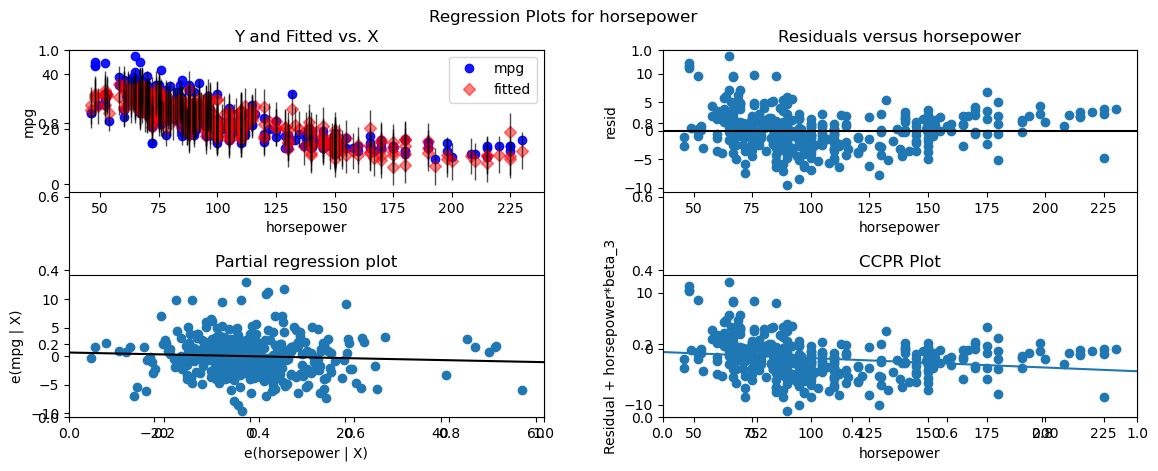

In [51]:
#Add your code here Residuals vs Fitted Values
 # Plot the specified diagnostic plots

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs. Fitted Values Plot
sm.graphics.plot_regress_exog(results, 'horsepower', fig=fig)
plt.show()

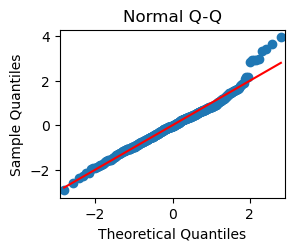

In [52]:
#Add your code here to plot QQ Plot
plt.subplot(2, 2, 2)
studentized_residuals = results.get_influence().resid_studentized_internal
sm.qqplot( studentized_residuals,line='s', ax=plt.gca())
plt.title('Normal Q-Q')

plt.show()

e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [ ]:
#Add your code here

f) Try a few different transformations of the variables, such as log⁡(X),√X,X^2. Comment on your findings.

In [ ]:
#Add your code here

Additional Practice Questions: 
- Explain the difference between MLR and OLS to a non-technical audience. 
- How would you describe this exercise in an interview to both a technical and non-technical interviewer? 
- What are the key insights you would want to show ? 
- Can you think of a business context where this exercise would have applications?